## Problem 1: Linear Regression
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## Data Dictionary:
Variable Name Description

Carat Carat weight of the cubic zirconia.

Cut Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color Colour of the cubic zirconia.With D being the worst and J the best.

Clarity Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price the Price of the cubic zirconia.

X Length of the cubic zirconia in mm.

Y Width of the cubic zirconia in mm.

Z Height of the cubic zirconia in mm.

In [1]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import math
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [3]:
data1=pd.read_csv("G:/DataSets/cubic_zirconia.csv")
data1

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [4]:
data_df=data1

## Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [5]:
#We have dropped the Unnamed: 0 colum as it is of no use of it.
data_df=data_df.drop(['Unnamed: 0'],axis=1)

In [6]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
data_df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [9]:
data_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [10]:
print("Number of rows: ",data_df.shape[0], "\n""Number. of columns: ",data_df.shape[1])

Number of rows:  26967 
Number. of columns:  10


In [11]:
#The Dataset is having total 697 missing values in column depth
data_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [12]:
data_df[data_df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [13]:
# Percentage of missing values
# As in any column if having missing value more than 5 % than using mean or median can impact the performance of the model.
#So Here we can replace it by mean or median.
# If the missing value in any column is above 5% ,for that specific column we can use KNN Imputer.
# KNN IMPUTER- This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values.
100 * data_df.isnull().sum() / len(data_df)

carat      0.00000
cut        0.00000
color      0.00000
clarity    0.00000
depth      2.58464
table      0.00000
x          0.00000
y          0.00000
z          0.00000
price      0.00000
dtype: float64

In [14]:
### Imputing missing values
for column in data_df.columns:
    if data_df[column].dtype != 'object':
        median = data_df[column].median()
        data_df[column] = data_df[column].fillna(median)    
        
data_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [15]:
data_df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.746564,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.394509,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


1. Around 50 percent of cubic zirconia carat weight has the same length and width around 5.6 to 5.7
2. Among length,width and height zirconia has the highest of width around 58.9 mm as compared to length and height.
3. Most of the 50 percent of the cubic zirconia has the price of nearly 2375.
4. The highest weight of cubic zirconia is of 4.5 and least is of 0.2
5. Carat ranges from 0.2 to 4.5 of the cubic zircoia with the price range starting from 326 to 18818.
6. With the increase of depth, the table size is also increasing of cubic zirconia.

In [16]:
data_df.describe(include='object')

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [17]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [18]:
#So dropping duplicate values
data_df.drop_duplicates(inplace=True)

In [19]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [20]:
print("Number of rows: ",data_df.shape[0], "\n""Number. of columns: ",data_df.shape[1])

Number of rows:  26933 
Number. of columns:  10


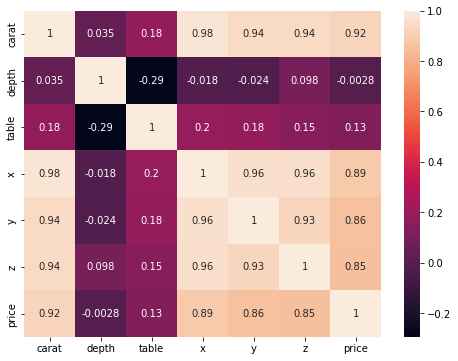

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(data_df.corr(),annot=True)
plt.show()

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. It also tell us about the correlation between the variables.

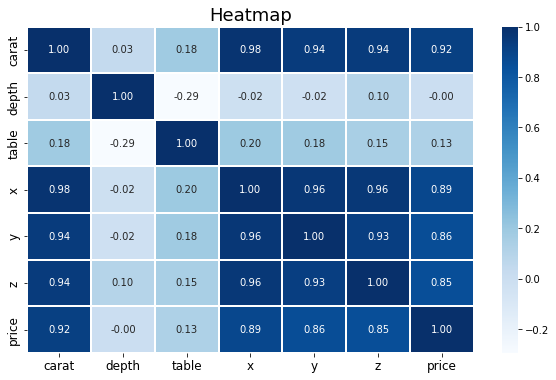

In [22]:
#We can perfom correlation between variables by using heat map
plt.figure(figsize=(10,6))
res=sns.heatmap(data_df.corr(),annot=True,fmt=".2f",cmap="Blues",linewidths=1.5);
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12);
plt.title('Heatmap',fontsize = 18);

###  From the above graph we can also see the corelation between X(independents variables) and Y(dependent variable) . The highest coorelation is between carat and price which is of 92 percent. Its a significant relationship.
### From the Heatmap Graph we can observed that cart and X is highly co-related with each other and least corelated are Table and depth with each other.

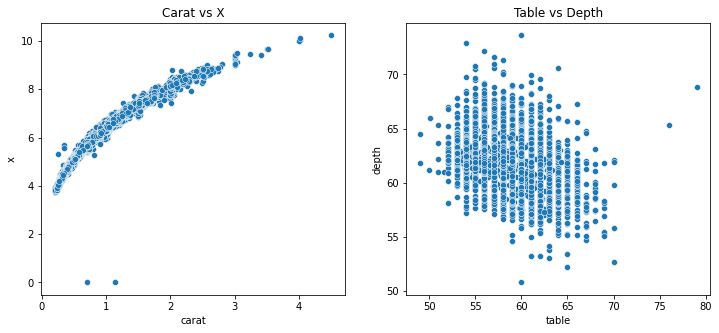

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Carat vs X')
sns.scatterplot(x="carat",y="x",data=data_df)
plt.subplot(1,2,2)
plt.title('Table vs Depth')
sns.scatterplot(x="table",y="depth",data=data_df);

In [24]:
## unique values for categorical variables
for column in data_df.columns:
    if data_df[column].dtype == 'object':
        print(column.upper(),': ',data_df[column].nunique())
        print(data_df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [28]:
from pandas_profiling import ProfileReport ### Pandas profiling is an open source Python module with which we can quickly do an 
report =ProfileReport(data_df)             ### exploratory data analysis with just a few lines of code. So pandas-profiling 
report.to_file('pandasprofile.html')       ### generates profile reports from a pandas DataFrame.      

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization-
## Univariate Analysis

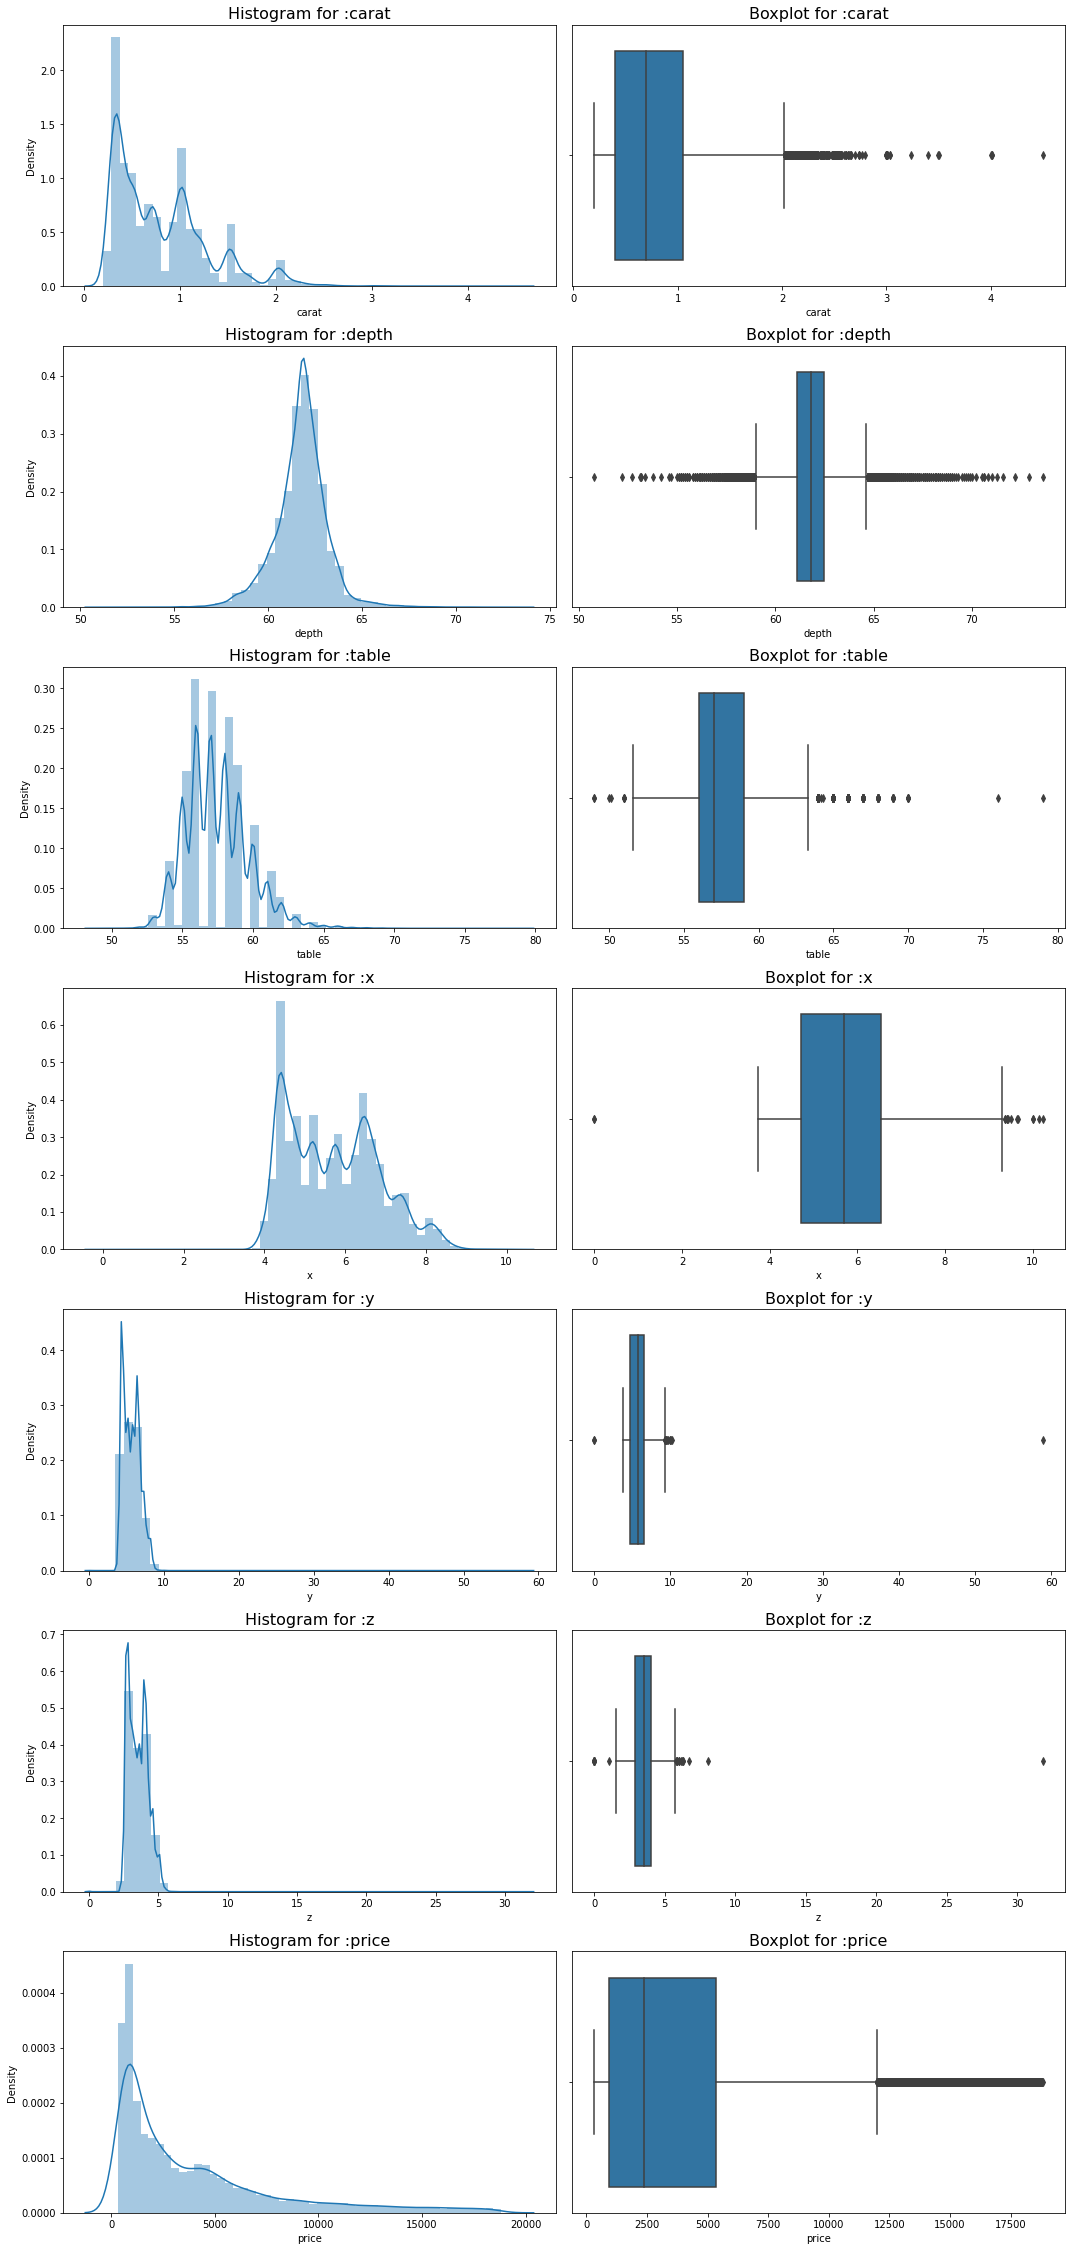

In [29]:
a=1
plt.figure(figsize=(15,80))
for i in data_df.columns :
    if data_df[i].dtypes != 'object':
        plt.subplot(18,2,a)
        sns.distplot(data_df[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(18,2,a+1)
        sns.boxplot(data_df[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

In [30]:
print("Skewness values"'\n',data_df.skew())

Skewness values
 carat    1.114789
depth   -0.029475
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64


## Visulization of Categorical Variables

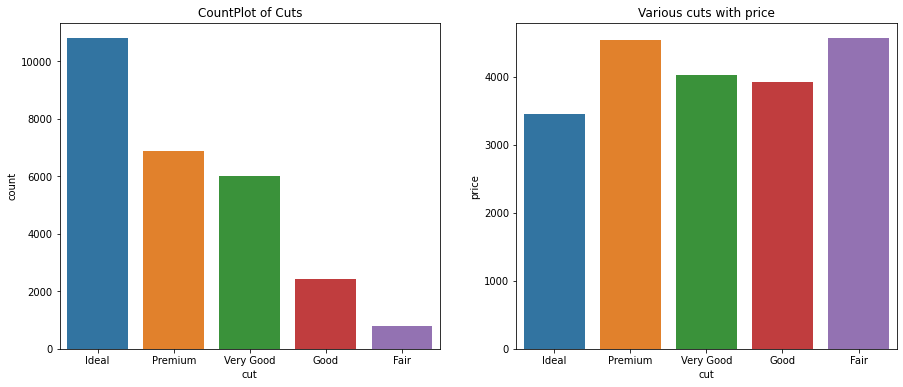

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data_df['cut'])
plt.title("CountPlot of Cuts")
plt.subplot(1,2,2)
sns.barplot(y=data_df['price'],x=data_df["cut"],ci=False)
plt.title("Various cuts with price");

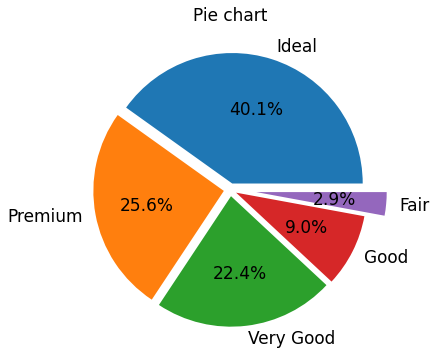

In [33]:
plt.figure(figsize=(6,6))
plt.pie(data_df['cut'].value_counts(),labels=data_df['cut'].value_counts().index,autopct='%0.1f%%',explode=[0.05,0.05,0.05,0.05,0.2],textprops={'fontsize': 17})
plt.title('Pie chart',fontsize=17)

plt.show();

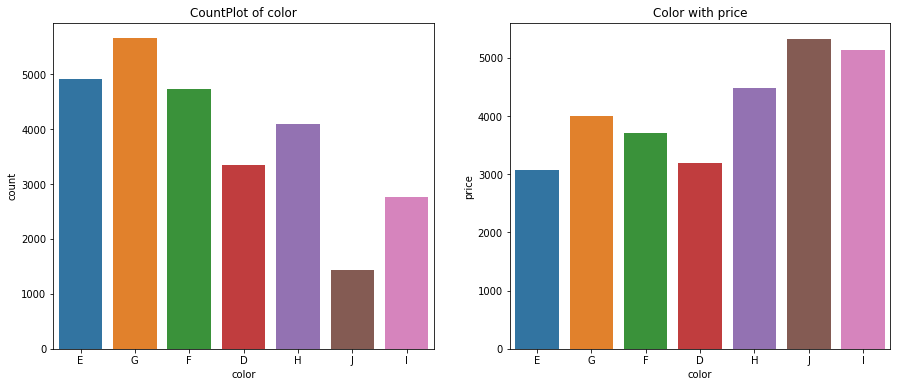

In [34]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data_df['color'])
plt.title("CountPlot of color")
plt.subplot(1,2,2)
sns.barplot(y=data_df['price'],x=data_df["color"],ci=False)
plt.title("Color with price");

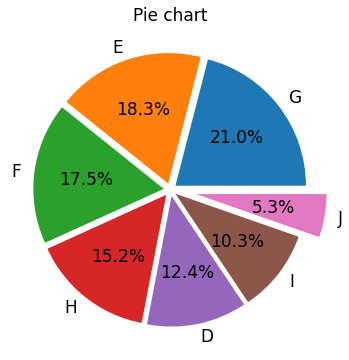

In [35]:
plt.figure(figsize=(6,6))
plt.pie(data_df['color'].value_counts(),labels=data_df['color'].value_counts().index,autopct='%0.1f%%',explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.2],textprops={'fontsize': 17})
plt.title('Pie chart',fontsize=17)
plt.show();

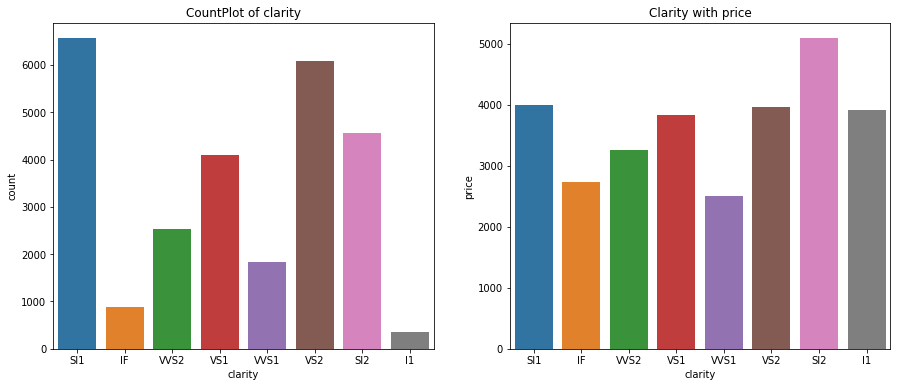

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data_df['clarity'])
plt.title("CountPlot of clarity")
plt.subplot(1,2,2)
sns.barplot(y=data_df['price'],x=data_df["clarity"],ci=False)
plt.title("Clarity with price");

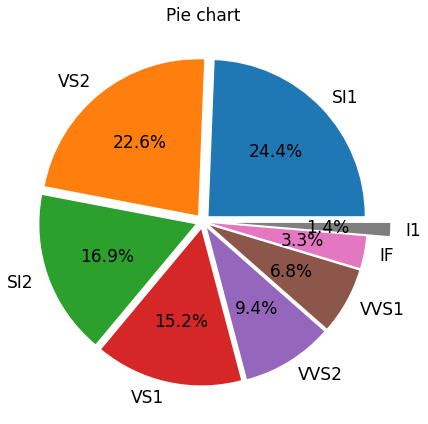

In [37]:
plt.figure(figsize=(6,6))
plt.pie(data_df['clarity'].value_counts(),labels=data_df['clarity'].value_counts().index,autopct='%0.1f%%',explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.2],textprops={'fontsize': 17})
plt.title('Pie chart',fontsize=17)
plt.tight_layout()

## Multi-variate Analysis
### In the below plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

<Figure size 432x288 with 0 Axes>

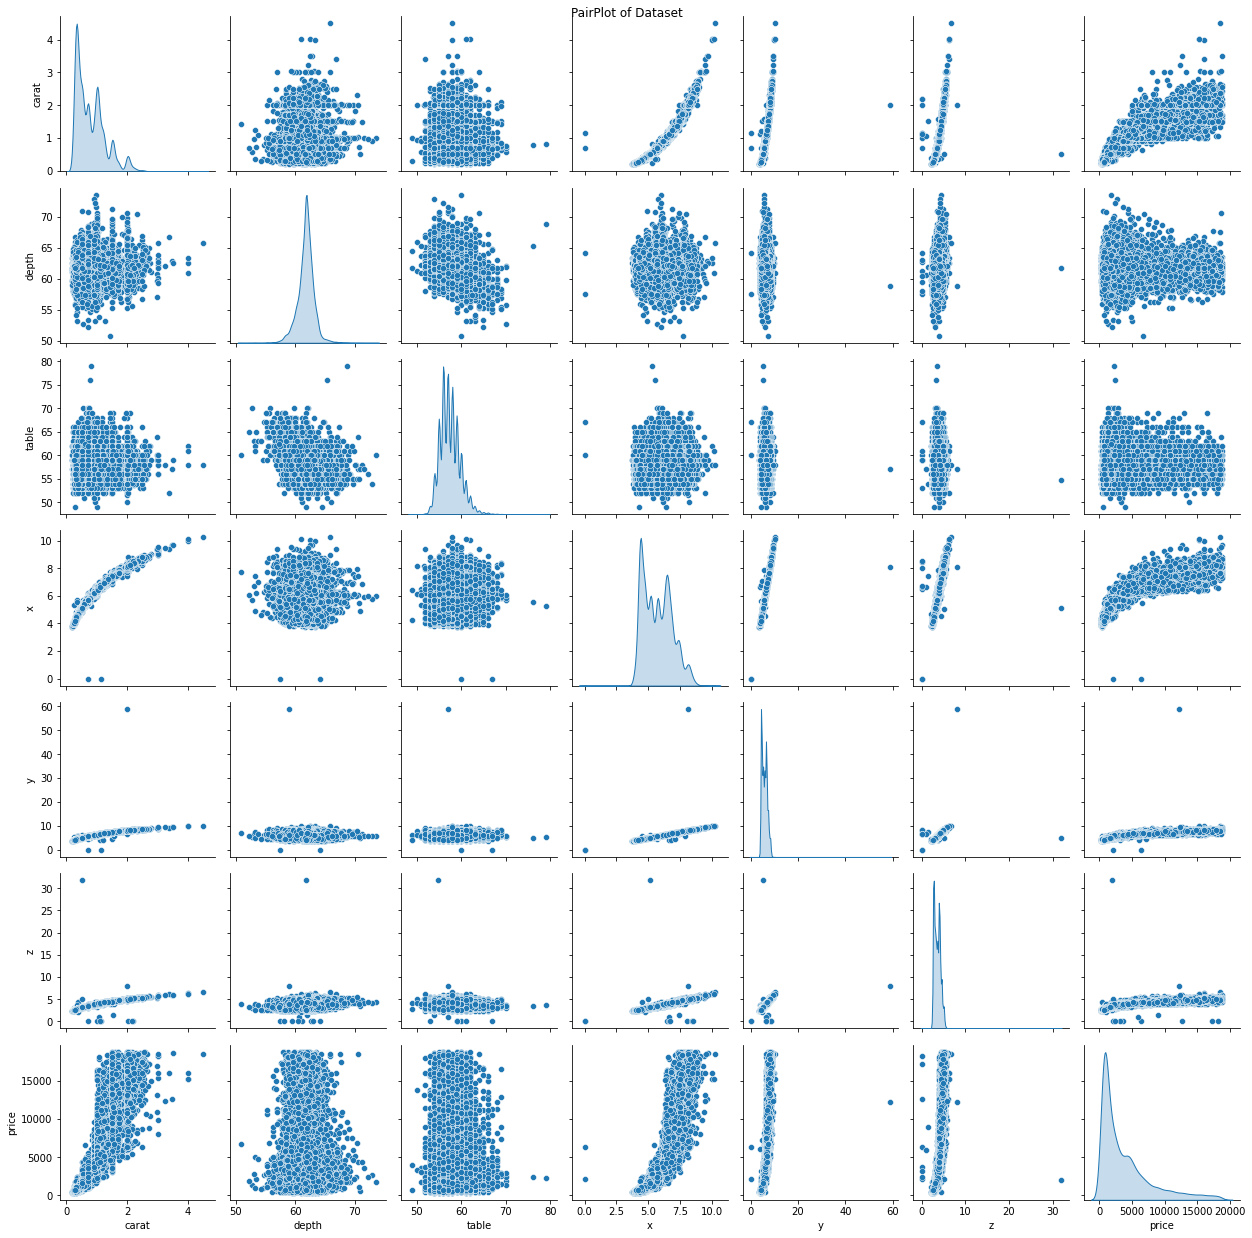

In [38]:
plt.tight_layout()
pairplot = sns.pairplot(data_df,diag_kind='kde')
pairplot.fig.suptitle("PairPlot of Dataset")
plt.tight_layout()